In [4]:
import pandas as pd
import numpy as np
import pickle
import math

In [2]:
df = pd.read_pickle('/home/earthquakes1/homes/Rebecca/phd/data/results_database/eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20')

In [3]:
df.iloc[0]

level_0                                                            0
index                                                              0
eq_id                                                        2110129
eq_mag                                                           5.0
eq_mag_type                                                       MW
eq_time                                              20050131_173151
eq_loc                                     (-41.6009, 175.838, 19.9)
tp_max                                         [0.46069622670091653]
tp_max_stations                                          [NZ.MRZ.10]
tc                                              [0.7684089259007126]
tc_stations                                              [NZ.MRZ.10]
iv2                                                               []
iv2_distances                                                     []
iv2_stations                                                      []
pgd                               

In [5]:
def sort_tp_data(df, mag_lim = 0, n = 0, min_dist = 0, max_dist = 1000):
    list_mag = []
    list_tpmax = []
    count = 0
    for index, row in df.iterrows():
        print(index)
        if row.eq_mag > mag_lim and len(row.tp_max)>=n:
            list_mag.append(row.eq_mag)
            list_tpmax.append([])
            for d in range(0, len(row.tp_max)):
                if (row.tp_max[d] != None 
                    and row.tp_max[d]>0 
                    and row.distance_dict[row.tp_max_stations[d]] > min_dist
                    and row.distance_dict[row.tp_max_stations[d]] < max_dist):
                    list_tpmax[count].append(row.tp_max[d])
            count += 1
    return list_mag, list_tpmax

In [6]:
def calc_tp_mag_lim(df, mag_lim, n = 0, min_dist = 0, max_dist = 1000):
    #print(mag_lim)
    list_mags, list_tpmax = sort_tp_data(df, mag_lim, n = n, min_dist = min_dist, max_dist = max_dist)
    params = []
    y_aves_tp = []
    x_aves_tp = []
    i = 0
    for i  in range(0, len(list_mags)):
        if len(list_tpmax[i])>=1:
            mean_tp = np.mean(list_tpmax[i])
            std_tp = np.std(list_tpmax[i])
            y_tp = []
            for j in list_tpmax[i]:
                if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100:
                    y_tp.append(math.log(j, 10))
                elif len(list_tpmax[i])==1:
                    y_tp.append(math.log(j, 10))
            x_tp = np.zeros(len(y_tp))
            x_tp = x_tp + list_mags[i]
            c = 0
            if math.isnan(np.median(y_tp))==False:
                y_aves_tp.append(np.median(y_tp))
                x_aves_tp.append(list_mags[i])
    return x_aves_tp, y_aves_tp

In [8]:
from data_plotting_func_min_dist import *

In [9]:
min_dist = 0
max_dist = 200
x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=2, min_dist = min_dist, max_dist = max_dist)
x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=2, min_dist = min_dist, max_dist = max_dist)
x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=2, min_dist = min_dist, max_dist = max_dist)
x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=2, min_dist = min_dist, max_dist = max_dist)

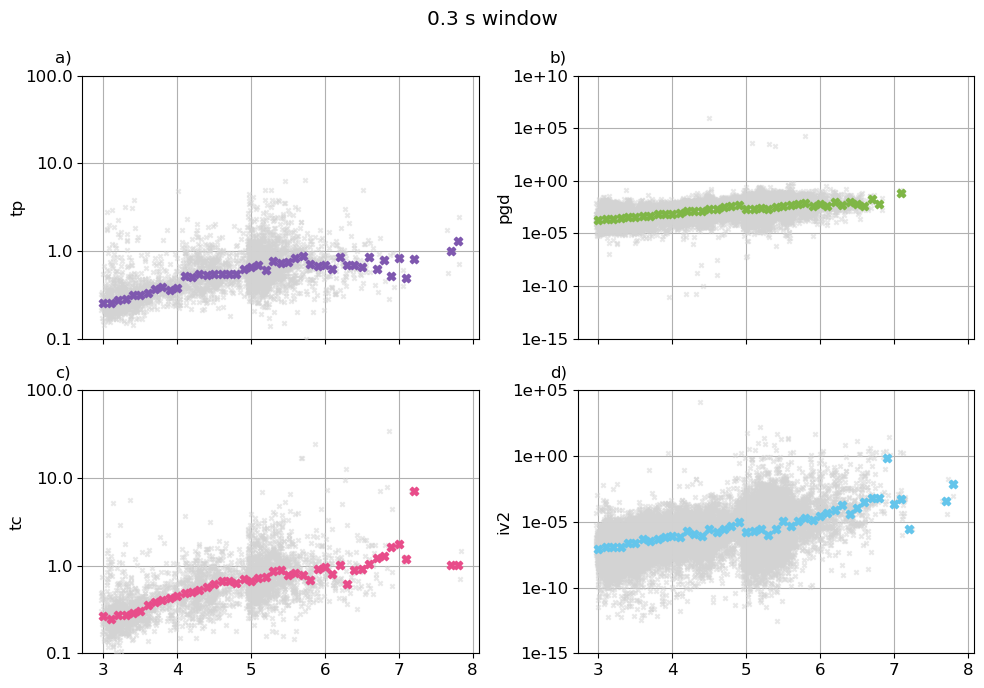

In [31]:
x_list = [x_tp, x_pgd, x_tc, x_iv2]
y_list = [y_tp, y_pgd, y_tc, y_iv2]
types = ['tp','pgd','tc','iv2']
f = 'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20'
fig, axs = plt.subplots(2,2,figsize = figure_sizes.a4landscape, sharex = True)
time = name_to_time(f)
snr = name_to_snr(f)
blank = name_to_blank(f)
for i in range(0, 4):
    row = i//2
    col = i%2
    axs[row][col].grid(True)
    axs[row][col].scatter(x_list[i]+np.random.uniform(-0.05, 0.05, len(x_list[i])), y_list[i], marker = 'x', color = 'lightgrey', s = 10, alpha = 0.5, zorder = 100, rasterized = True)
    axs[row][col].set_ylabel(types[i], fontsize = 12, labelpad = 0)
    axs[row][col].tick_params(axis='both', which='major', labelsize=12)
    axs[row][col].set_xticks([3,4,5,6,7,8],[], zorder = 110)
    median, bin_edges, bin_number = scipy.stats.binned_statistic(x_list[i], y_list[i], statistic='median', bins=np.arange(2.95,8.05,0.1), range=None)
    axs[row][col].scatter(bin_edges[:-1]+0.05, median, marker = 'X', facecolor = colors[types[i]], edgecolors = colors[types[i]], zorder = 1000)
import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
axs[0][0].text(0.0, 1.0, 'a)', transform=axs[0][0].transAxes + trans,
            fontsize='12', va='bottom')
axs[0][1].text(0.0, 1.0, 'b)', transform=axs[0][1].transAxes + trans,
            fontsize='12', va='bottom')
axs[1][0].text(0.0, 1.0, 'c)', transform=axs[1][0].transAxes + trans,
            fontsize='12', va='bottom')
axs[1][1].text(0.0, 1.0, 'd)', transform=axs[1][1].transAxes + trans,
            fontsize='12', va='bottom')
#y = ax.get_yticks()

axs[0][0].set_yticks([-1,0,1,2],[1e-1, 1e+0, 1e+1,1e+2])
axs[0][0].set_ylim([-1,2])
axs[1][0].set_yticks([-1,0,1,2],[1e-1, 1e+0, 1e+1,1e+2])
axs[1][0].set_ylim([-1,2])
axs[0][1].set_yticks(axs[0][1].get_yticks(), ['{0:.0e}'.format(flt) for flt in 10**axs[0][1].get_yticks()] )
axs[1][1].set_yticks(axs[1][1].get_yticks(), ['{0:.0e}'.format(flt) for flt in 10**axs[1][1].get_yticks()] )
axs[1][0].set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8], zorder = 110)
axs[1][1].set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8], zorder = 110)

#axs[0][0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axs[0][1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axs[1][0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#axs[1][1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.suptitle(f'{name_to_time(f)} s window')
figure = plt.gcf()
figure.set_size_inches(figure_sizes.a4landscape)
figure.tight_layout()


In [17]:
axs[0][1].get_yticks()

array([-15., -10.,  -5.,   0.,   5.,  10.])

In [24]:
10**axs[0][1].get_yticks()

array([1.e-15, 1.e-10, 1.e-05, 1.e+00, 1.e+05, 1.e+10])

In [27]:
['{0:.2e}'.format(flt) for flt in 10**axs[0][1].get_yticks()] 

['1.00e-15', '1.00e-10', '1.00e-05', '1.00e+00', '1.00e+05', '1.00e+10']